In [1]:
# Import our libraries 

# Pandas and numpy for data wrangling
import pandas as pd
import numpy as np

# Seaborn / matplotlib for visualization 
import seaborn as sns
sns.set()


import matplotlib.pyplot as plt
%matplotlib inline

# Import the trees from sklearn
from sklearn import tree

# Helper function to split our data
from sklearn.model_selection import train_test_split

# Helper fuctions to evaluate our model.
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score 

# Helper function for hyper-parameter turning.
from sklearn.model_selection import GridSearchCV

# Import our Decision Tree
from sklearn.tree import DecisionTreeClassifier 

from sklearn.tree import plot_tree, export_text

# Import our Random Forest 
from sklearn.ensemble import RandomForestClassifier


In [2]:
golf = pd.read_csv('data/golf.csv')

In [4]:
golf.head()

,Is_Sunny,Is_Hot,Is_Humid,Is_Windy,Played_Golf
0,True,True,False,False,True
1,True,True,False,False,True
2,True,True,False,False,True
3,False,False,True,False,False
4,False,True,True,False,True


['Is_Sunny', 'Is_Hot', 'Is_Humid', 'Is_Windy'] Played_Golf


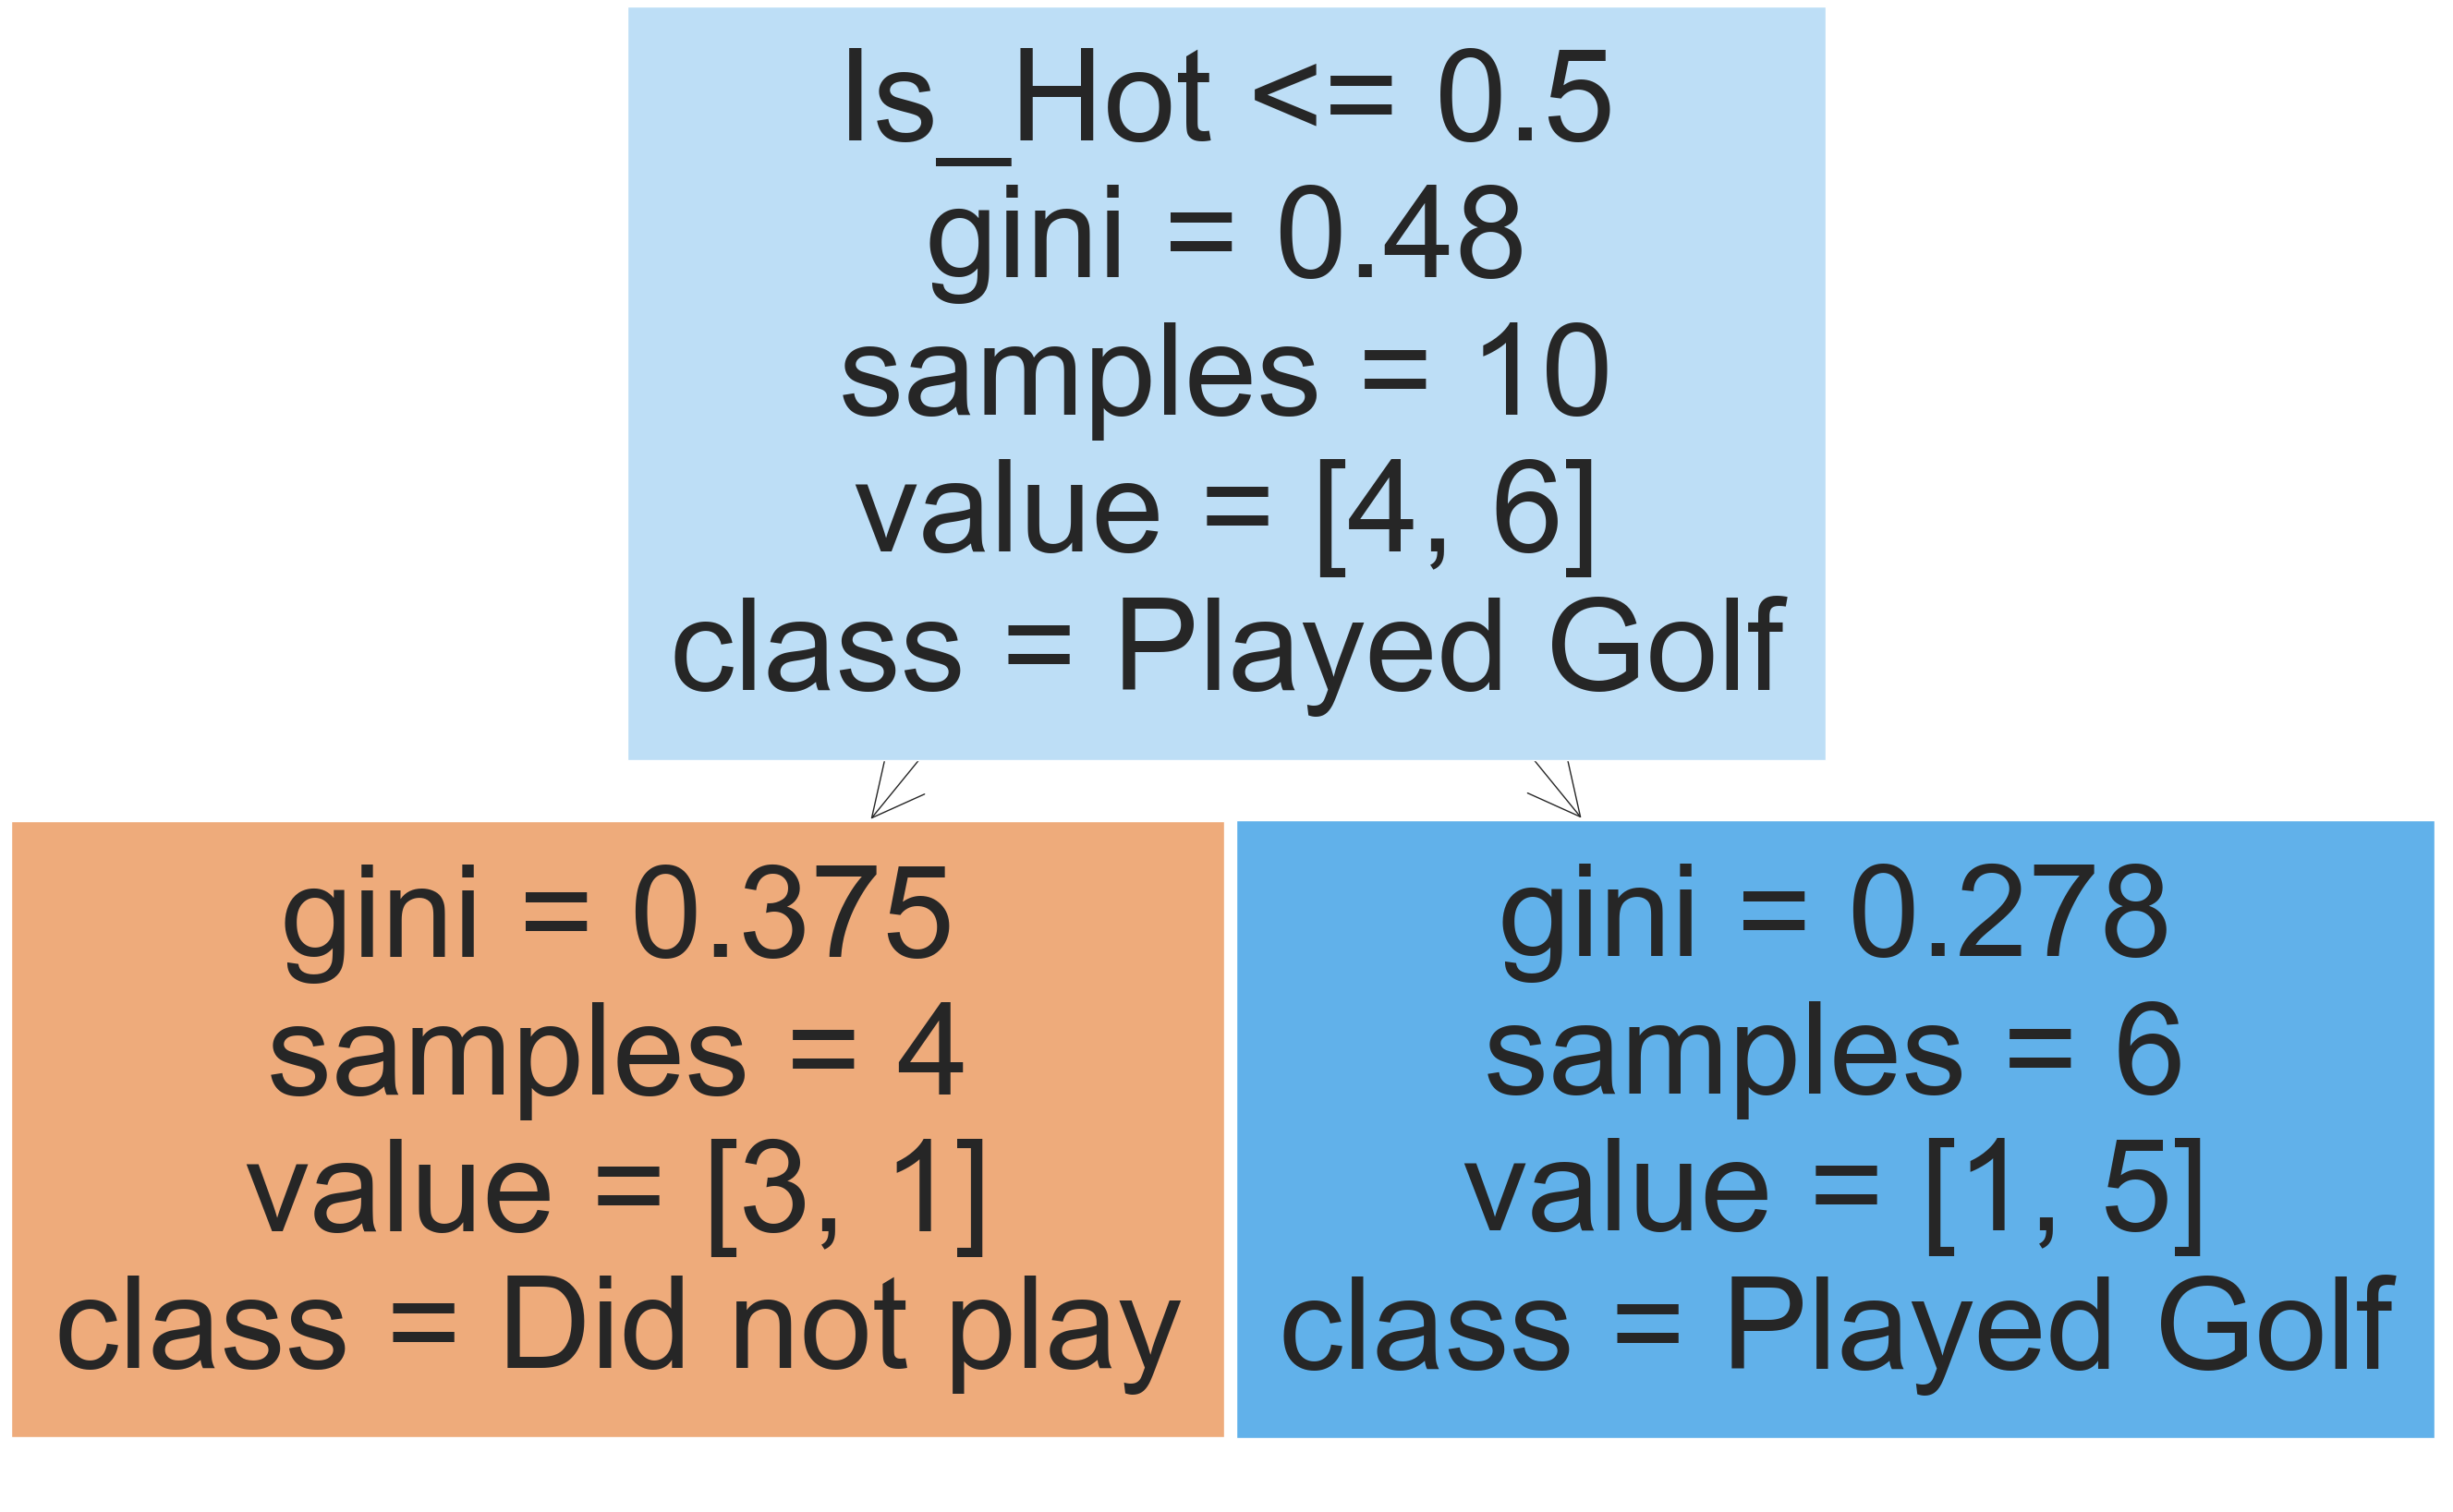

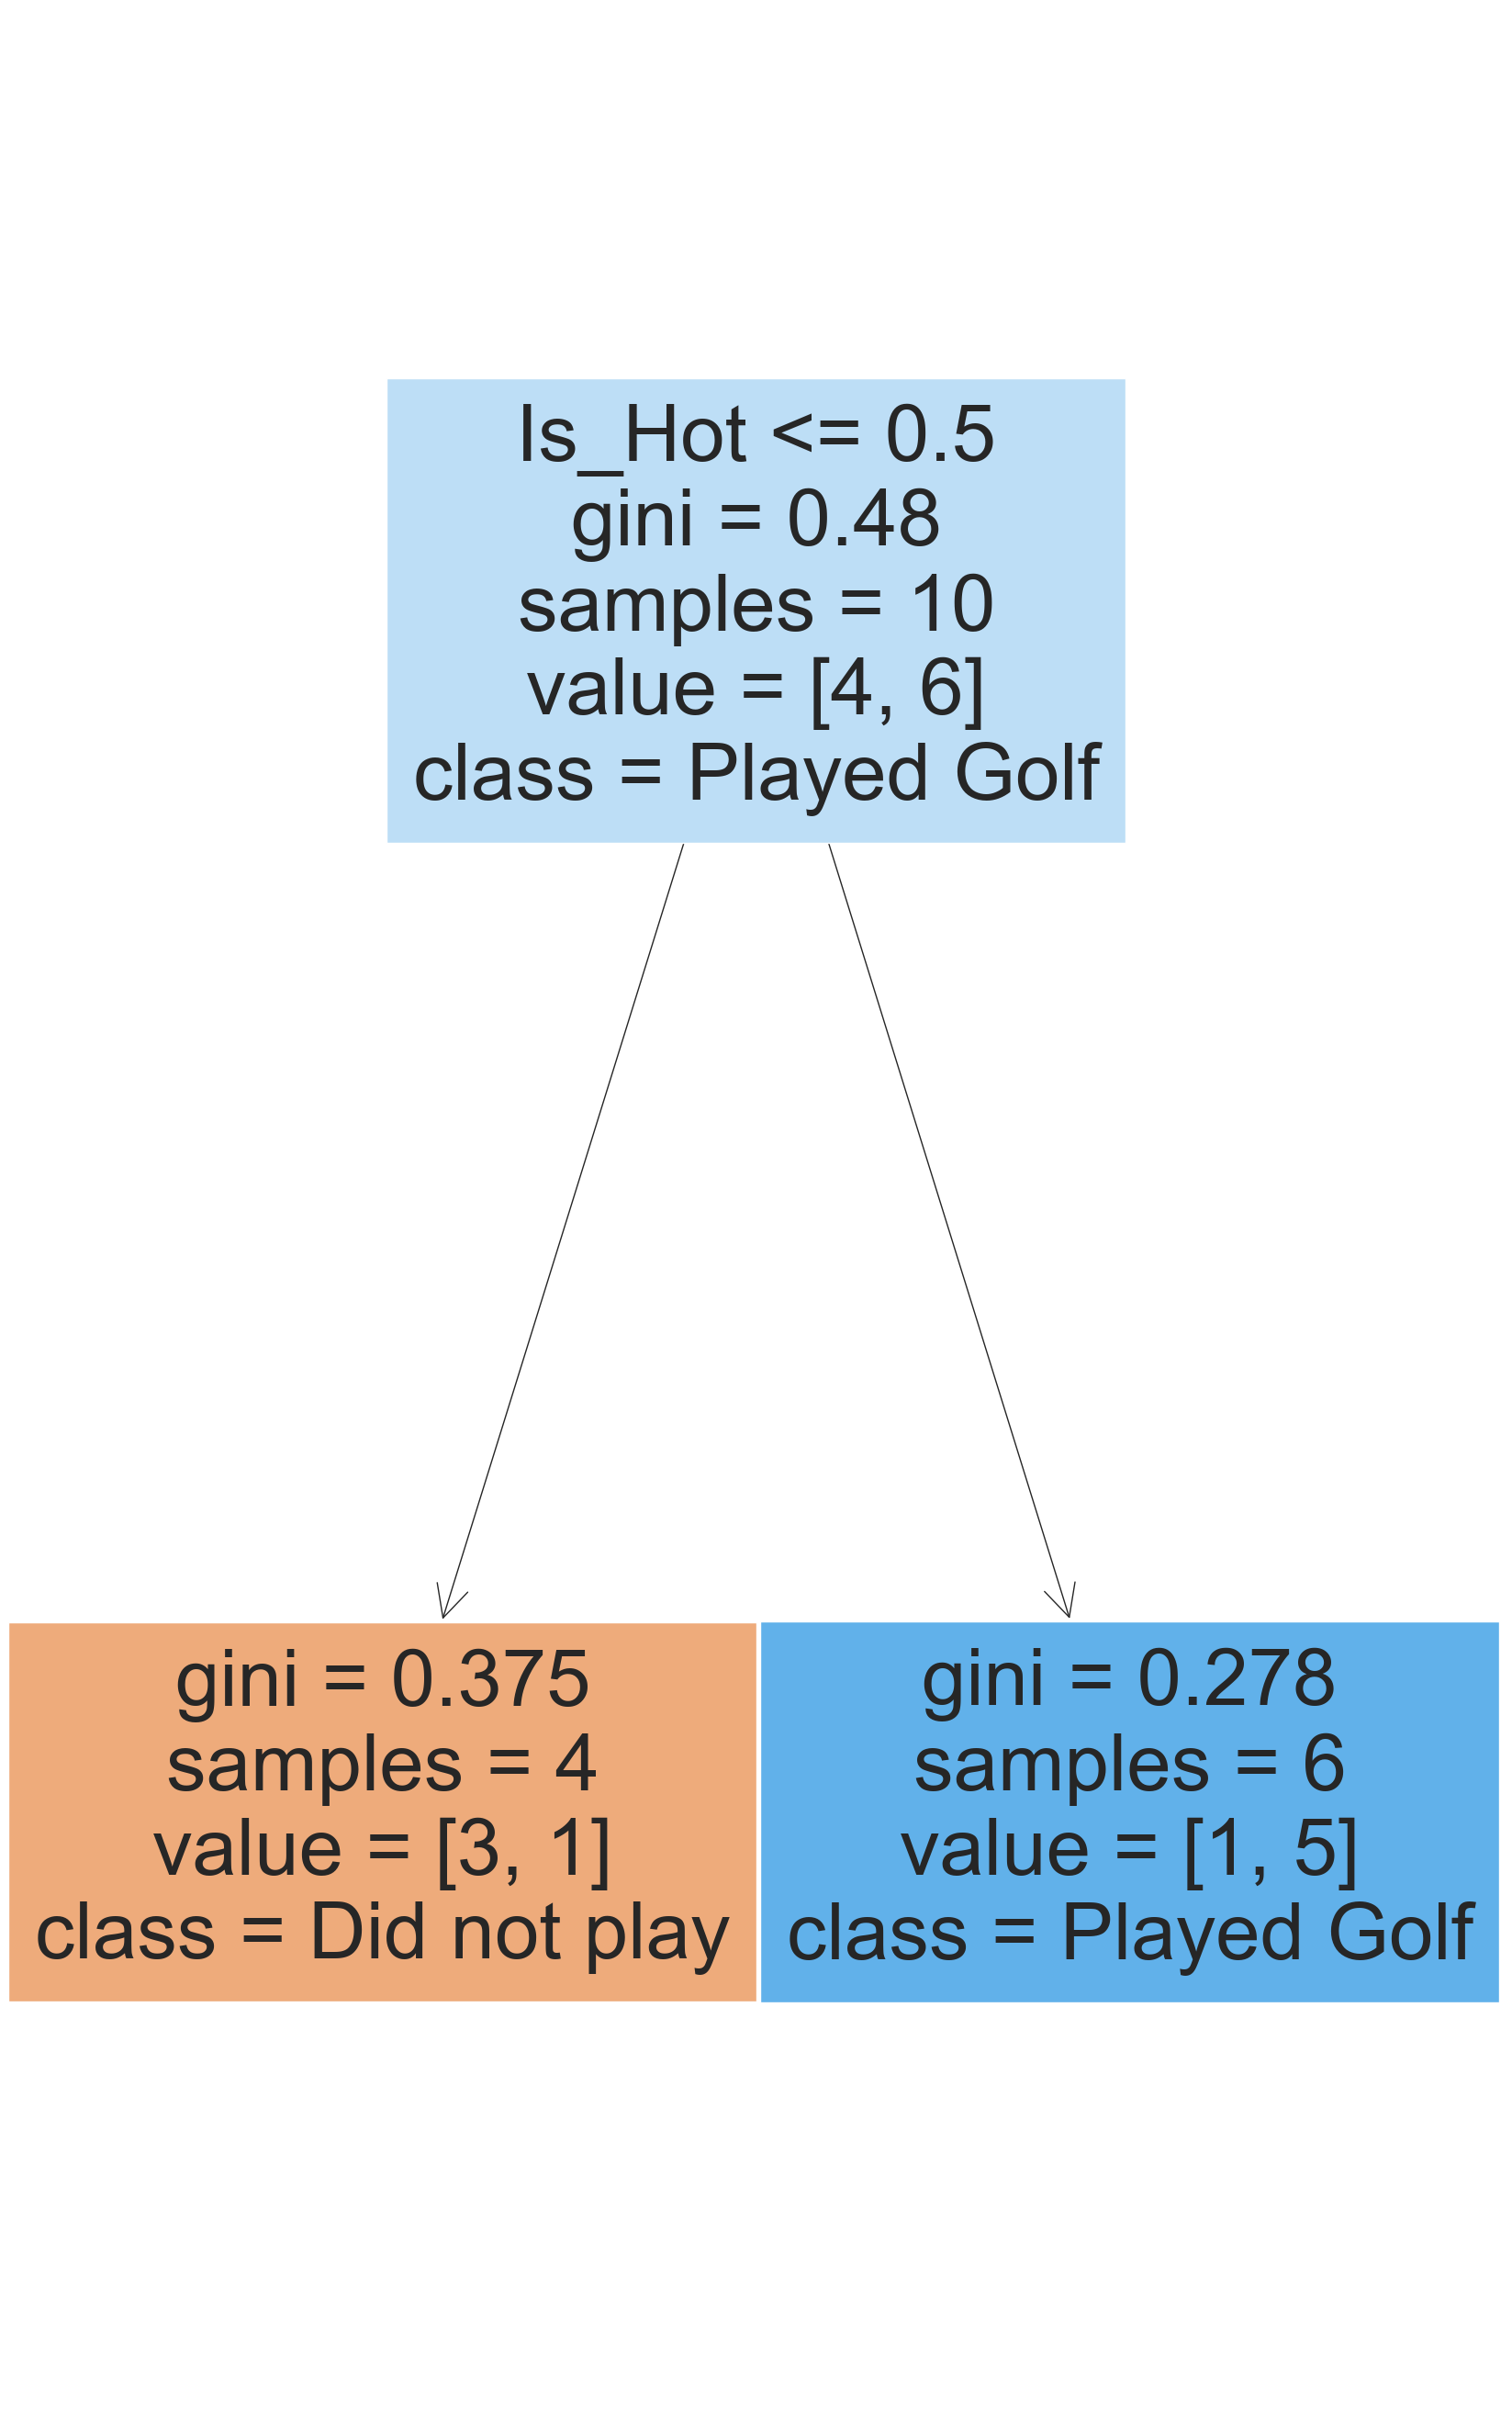

In [19]:
golf = pd.read_csv('data/golf.csv')

ivs = list(golf.columns)
dv = ivs.pop(-1)

print(ivs, dv)

from sklearn.tree import DecisionTreeClassifier 

X = golf[ivs]
y = golf[dv]

model = DecisionTreeClassifier(max_depth=1)

model.fit(X,y)

plt.figure(figsize=(34,21))
plot_tree(model, feature_names=ivs, class_names=['Did not play', 'Played Golf'], filled=True);



plt.figure(figsize=(21,34))
plot_tree(model, feature_names=ivs, class_names=['Did not play', 'Played Golf'], filled=True);


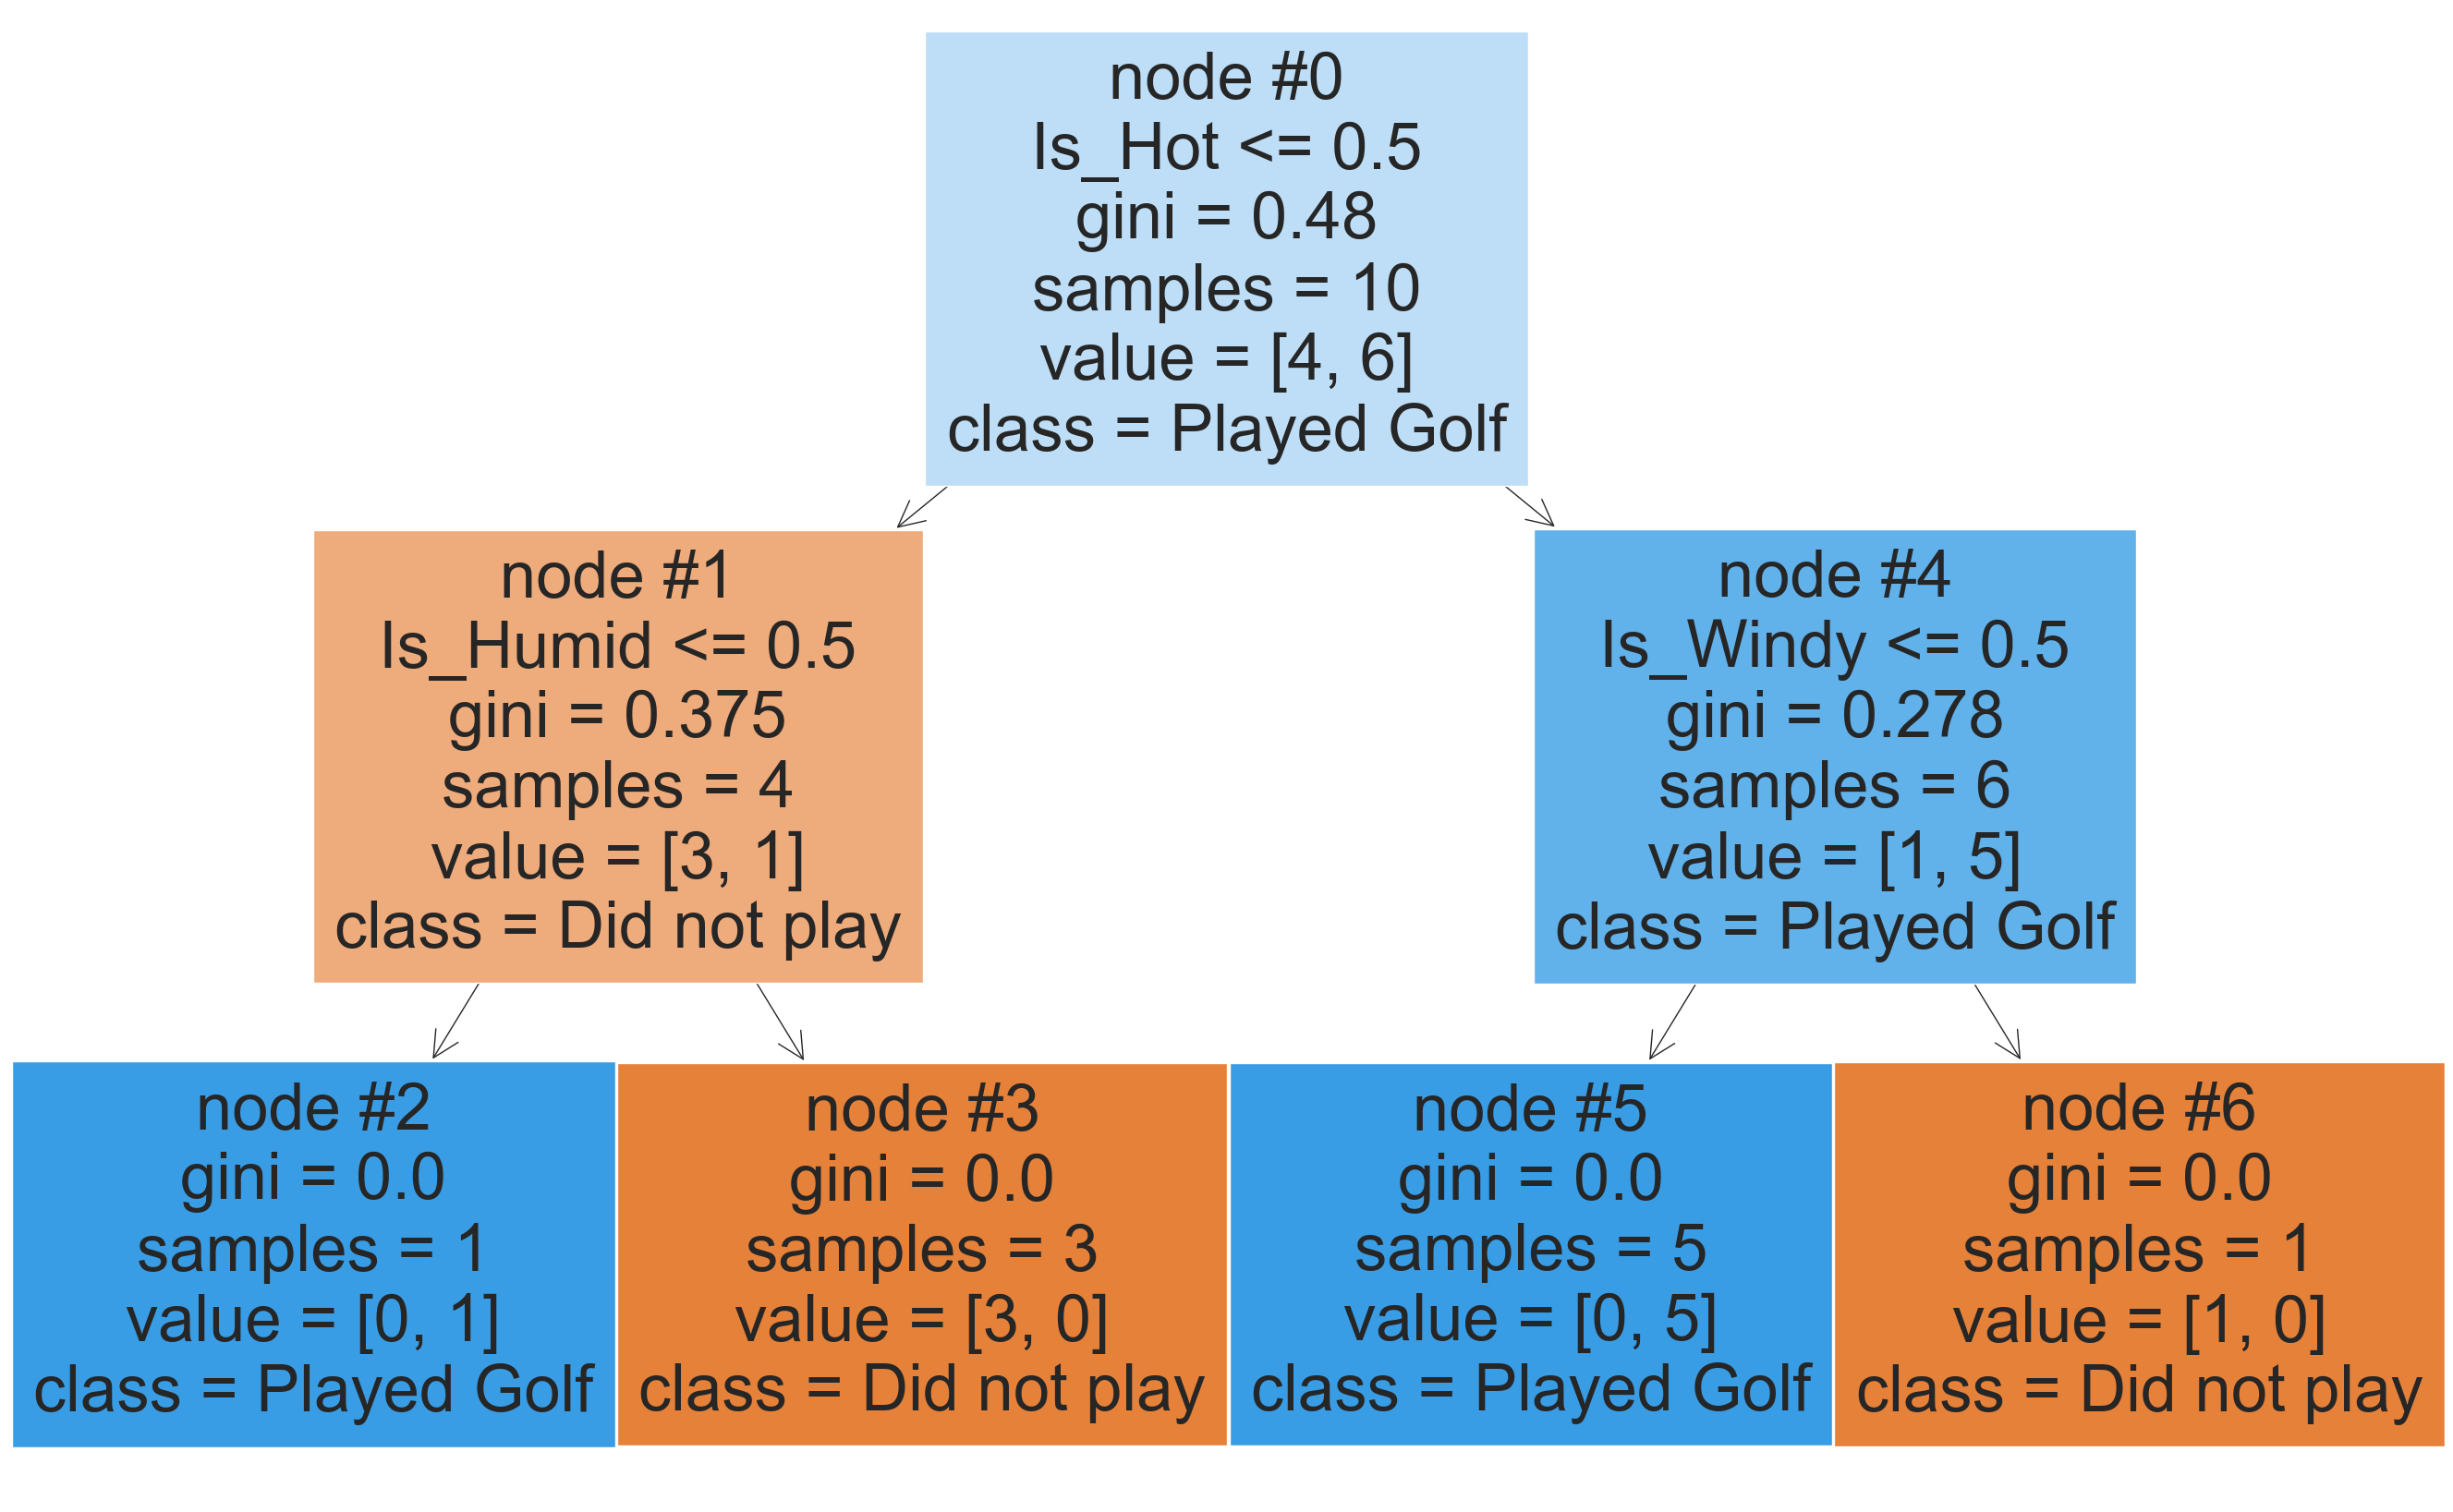

In [15]:

X = golf[ivs]
y = golf[dv]

model = DecisionTreeClassifier(max_depth=2)

model.fit(X,y)

plt.figure(figsize=(34,21))
plot_tree(model, node_ids=True, feature_names=ivs, class_names=['Did not play', 'Played Golf'], filled=True);

/Users/zacharydesario/anaconda3/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


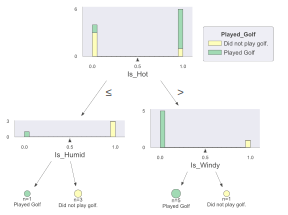

In [16]:

import dtreeviz

viz_model = dtreeviz.model(model,
                           X_train=golf[ivs], y_train=golf[dv],
                           feature_names=ivs,
                           target_name=dv, class_names=["Did not play golf.", "Played Golf"])

viz_model.view(scale=0.8)


In [ ]:
df = pd.read_csv('data/titanic.csv')
df.head()

# 1. Convert to numerical values if need be by using `pd.get_dummies()`
df = pd.get_dummies(df, columns=['sex', 'pclass', 'embarked'], drop_first=True)


independent_variables = ['fare', 'age',  
                     'sex_male', 'pclass_2', 'pclass_3',  
                     'sibsp', 'parch', 'embarked_Q','embarked_S']


dependent_variable = 'survived'
# Sklearn will throw an error if you have literal NAN's 
# You have to fill it with a value that is outside of the range of its current value.
df['age'] = df['age'].fillna(-999)

X = df[independent_variables]

y = df[dependent_variable]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

print('Lenght of our Training data:', X_train.shape, '\nLength of our Testing data:', y_test.shape)

model = DecisionTreeClassifier(max_depth=1)

model.fit(X_train,y_train)


In [ ]:
model.get_params()

In [ ]:
plot_tree(model, feature_names=independent_variables, class_names=['died', 'survived'], filled=True)

In [ ]:
from sklearn.tree import DecisionTreeClassifier 

model = DecisionTreeClassifier(max_depth=3)

model.fit(X_train,y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
print("Accuracy Score: %f" % accuracy)

precision = precision_score(y_true=y_test, y_pred=y_pred)
print("Precision Score: %f" % precision)

recall = recall_score(y_true=y_test, y_pred=y_pred)
print("Recall Score: %f" % recall)

f1 = f1_score(y_true=y_test, y_pred=y_pred)
print('F1 Score: %f' % f1)


# Calculate predicted probabilities
y_pred_proba = model.predict_proba(X_test)

# # Keep only the proba for True
y_pred_proba = y_pred_proba[:,1]

y_pred_proba

# # # Compute auc score
auc = roc_auc_score(y_true=y_test, y_score=y_pred_proba)

print('AUC Score: %f' % auc)

In [ ]:
plt.figure(figsize=(21,21))
plot_tree(model, feature_names=independent_variables, class_names=['died', 'survived'], filled=True);

In [ ]:
from sklearn.tree import DecisionTreeClassifier 

model = DecisionTreeClassifier(max_depth=999)

model.fit(X_train,y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
print("Accuracy Score: %f" % accuracy)

precision = precision_score(y_true=y_test, y_pred=y_pred)
print("Precision Score: %f" % precision)

recall = recall_score(y_true=y_test, y_pred=y_pred)
print("Recall Score: %f" % recall)

f1 = f1_score(y_true=y_test, y_pred=y_pred)
print('F1 Score: %f' % f1)


# Calculate predicted probabilities
y_pred_proba = model.predict_proba(X_test)

# # Keep only the proba for True
y_pred_proba = y_pred_proba[:,1]

y_pred_proba

# # # Compute auc score
auc = roc_auc_score(y_true=y_test, y_score=y_pred_proba)

print('AUC Score: %f' % auc)

In [ ]:
plt.figure(figsize=(360,90))
plot_tree(model, feature_names=independent_variables, class_names=['died', 'survived'], filled=True);

In [ ]:
model.tree_.impurity

['Is_Sunny', 'Is_Hot', 'Is_Humid', 'Is_Windy'] Played_Golf


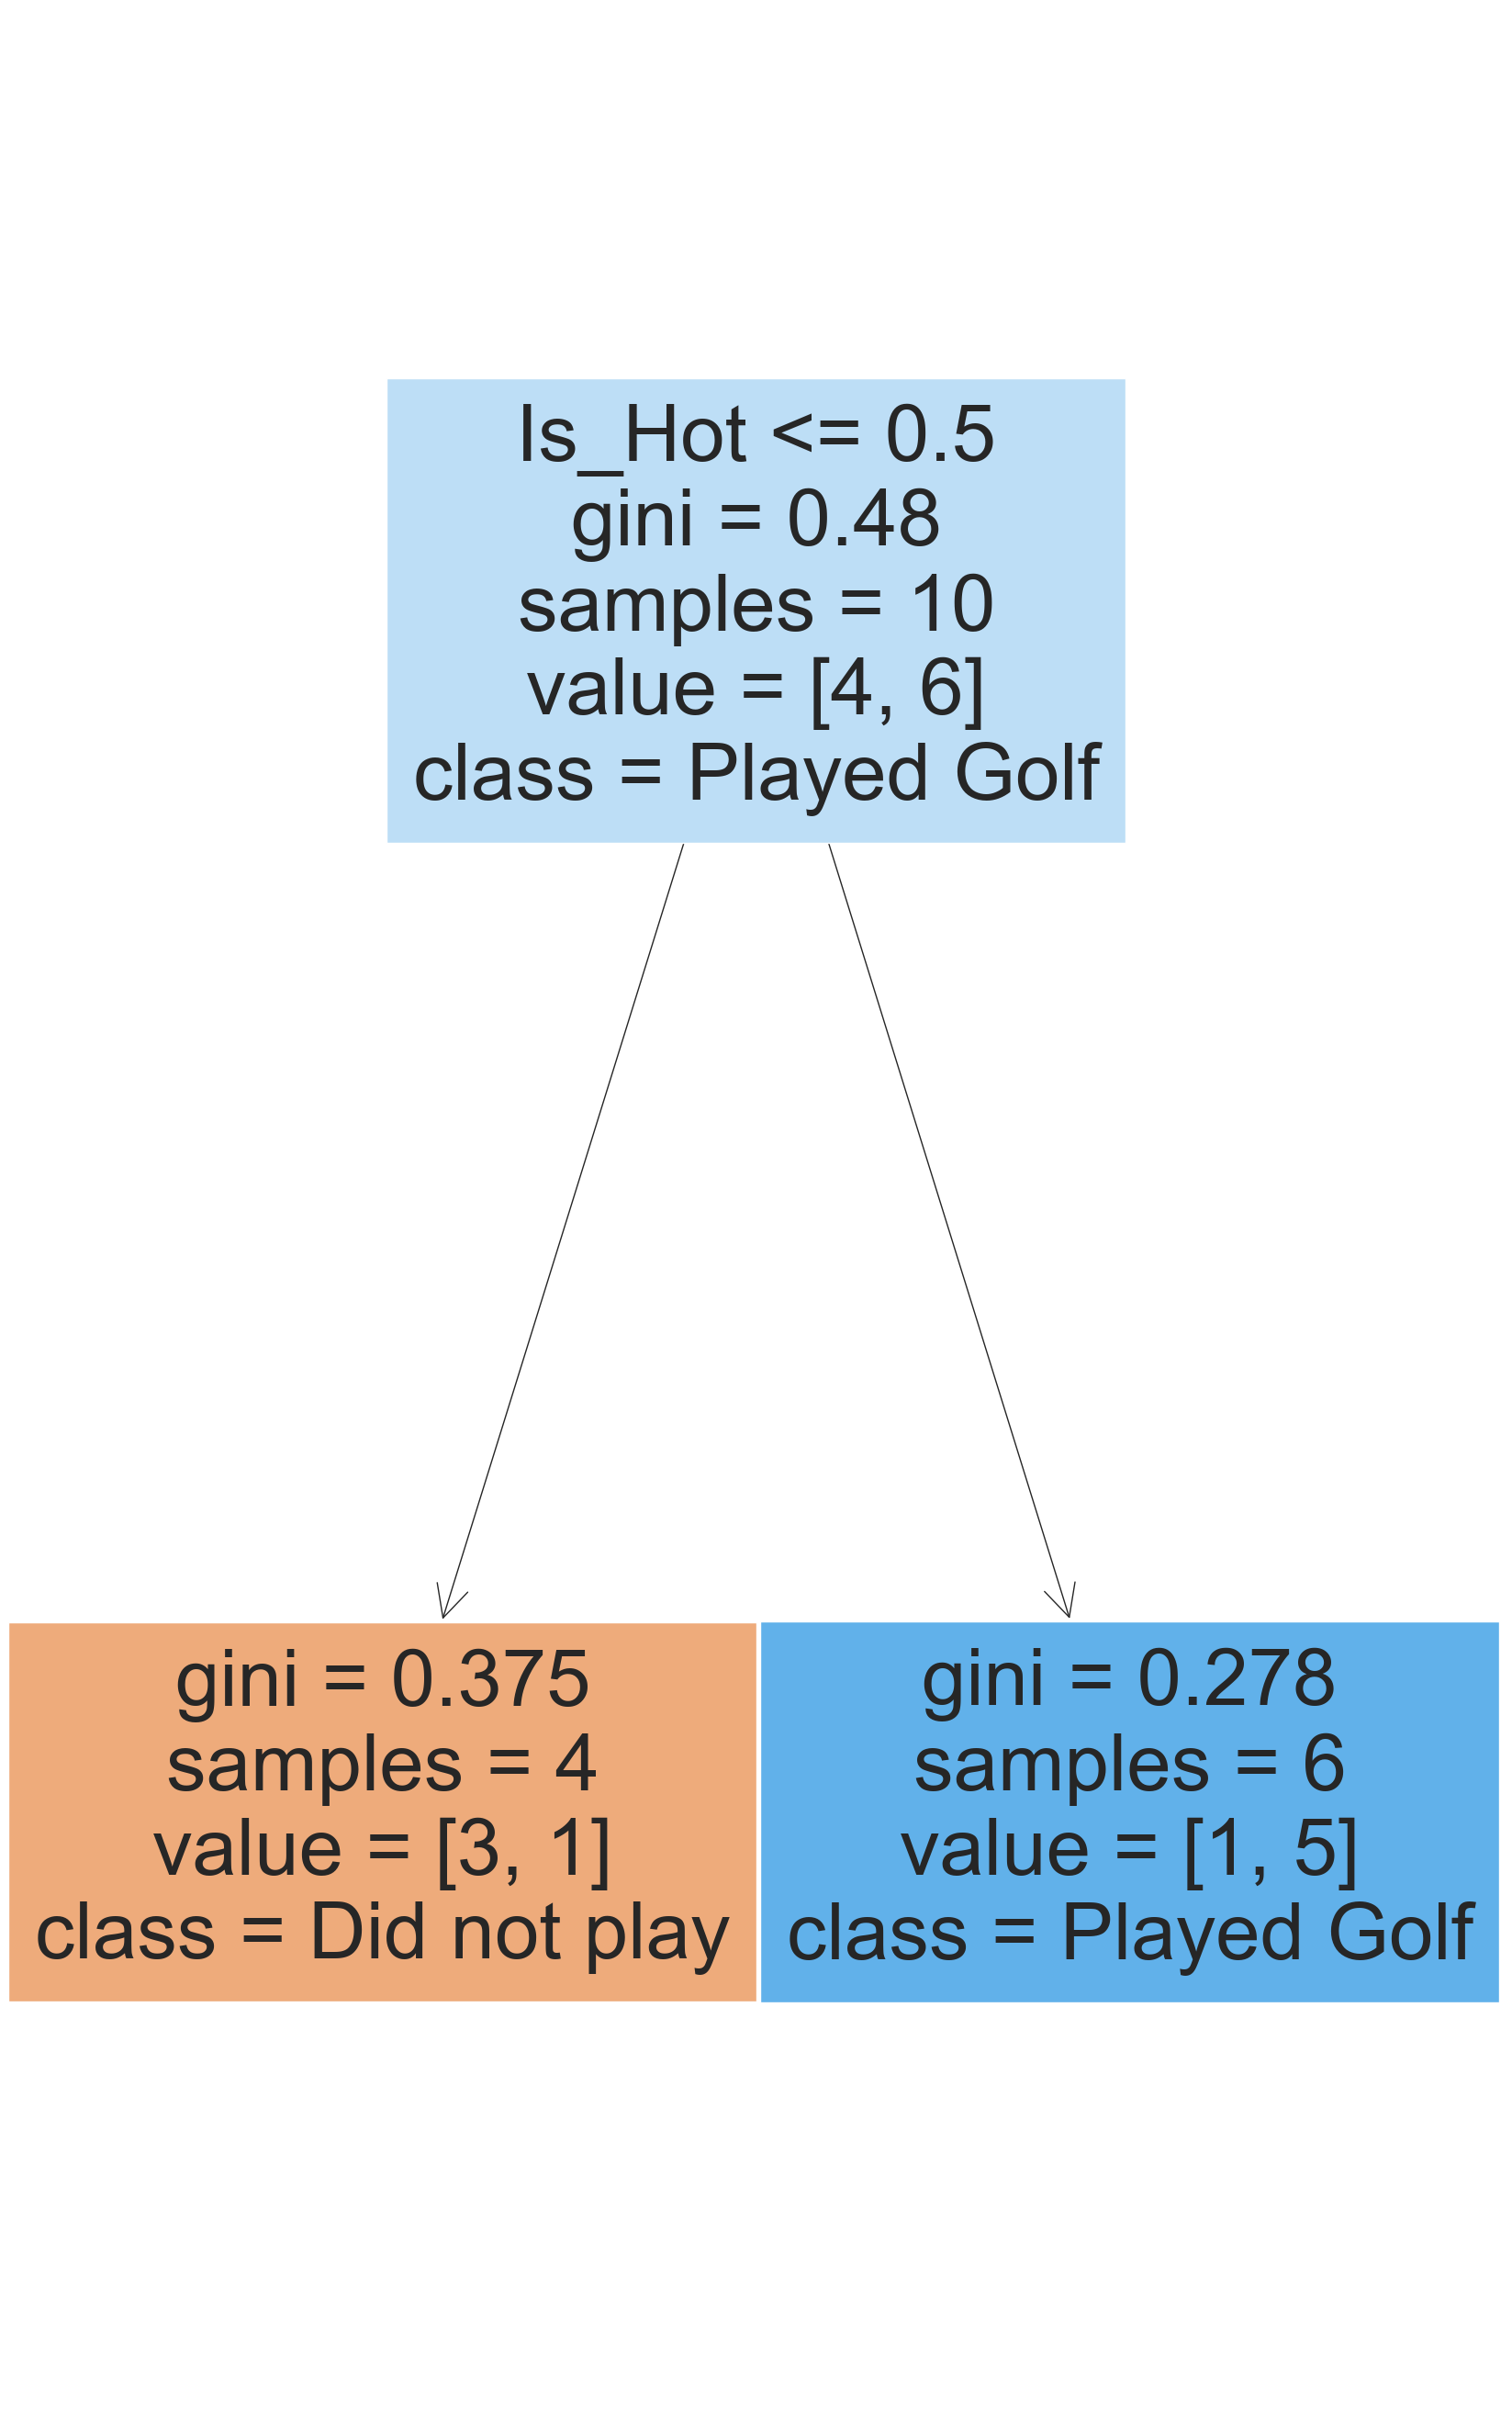

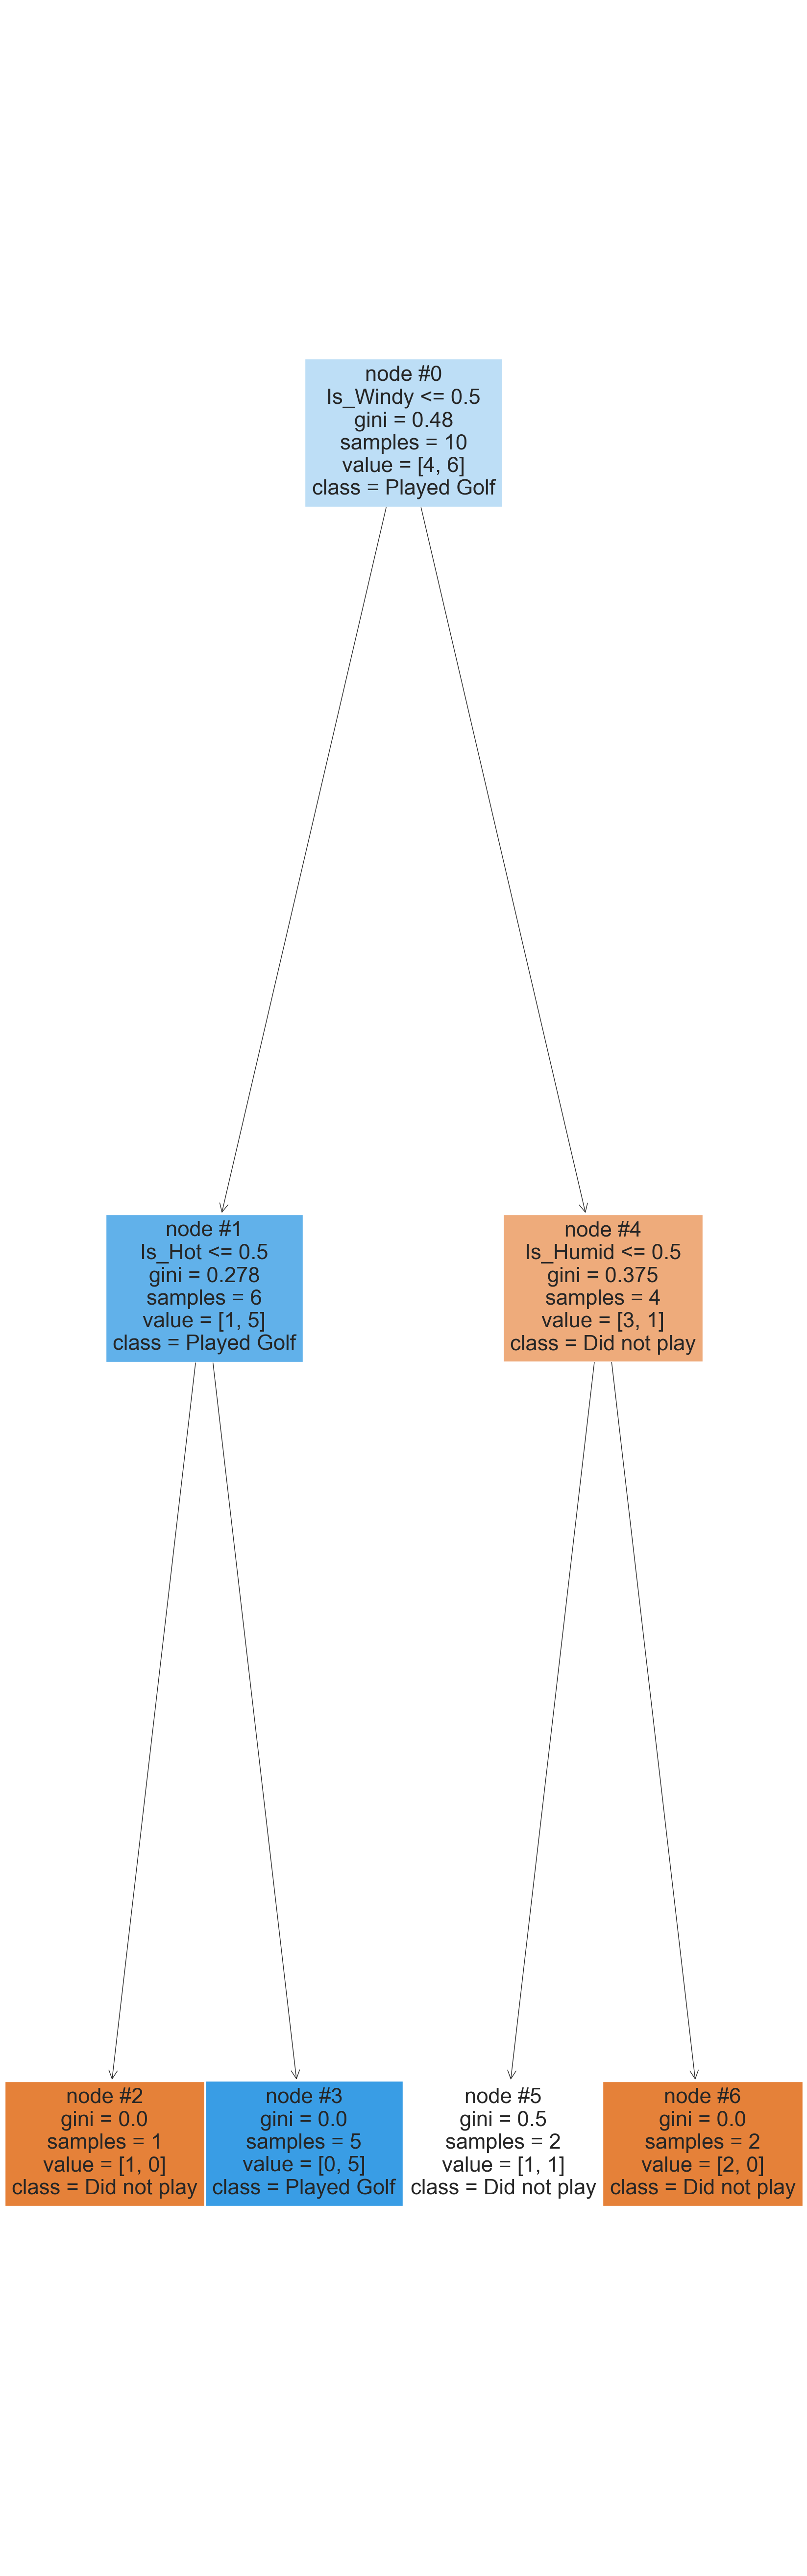

# Using a new library called [dtreeviz](https://github.com/parrt/dtreeviz/blob/master/notebooks/dtreeviz_sklearn_visualisations.ipynb)

In [ ]:
! pip install dtreeviz

In [ ]:
from sklearn.tree import DecisionTreeClassifier 

model = DecisionTreeClassifier(max_depth=3)

model.fit(X_train,y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
print("Accuracy Score: %f" % accuracy)

precision = precision_score(y_true=y_test, y_pred=y_pred)
print("Precision Score: %f" % precision)

recall = recall_score(y_true=y_test, y_pred=y_pred)
print("Recall Score: %f" % recall)

f1 = f1_score(y_true=y_test, y_pred=y_pred)
print('F1 Score: %f' % f1)


# Calculate predicted probabilities
y_pred_proba = model.predict_proba(X_test)

# # Keep only the proba for True
y_pred_proba = y_pred_proba[:,1]

y_pred_proba

# # # Compute auc score
auc = roc_auc_score(y_true=y_test, y_score=y_pred_proba)

print('AUC Score: %f' % auc)

In [ ]:
feature_names=selected_features 
class_names=['died', 'survived']
target_name = 'survived'
import dtreeviz

viz_model = dtreeviz.model(model,
                           X_train=df[feature_names], y_train=df[target_name],
                           feature_names=feature_names,
                           target_name=target_name, class_names=["died", "survived"])



In [ ]:
viz_model.view(scale=0.8)


In [ ]:
viz_model.view(orientation="LR")


In [ ]:
x = df[selected_features].iloc[9]
x

In [ ]:
viz_model.view(x=x)
